# my frist project in Machine learning internship SYNC INTERN'S

## Week 1 >>Task 1>>Create a chat Bot

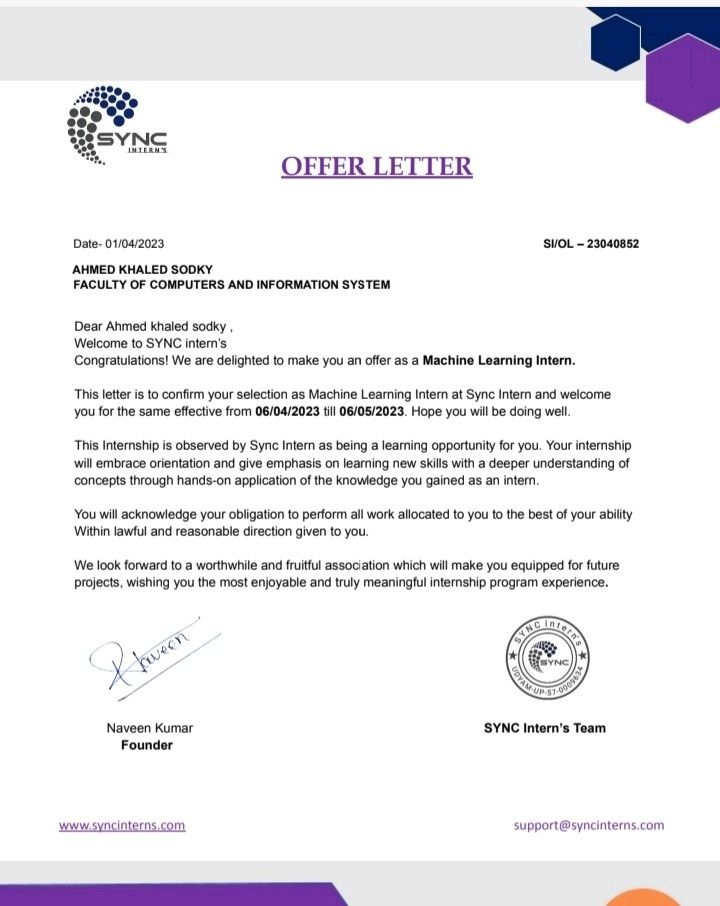

In [15]:
#import Libraries
import tensorflow as tf
import numpy as np

In [16]:

# Define the dataset of questions and answers
dataset = {
  "What is machine learning?": "Machine learning is a subset of artificial intelligence that involves training algorithms to make predictions or decisions based on data.",
  "What is a neural network?": "A neural network is a type of machine learning algorithm that is inspired by the structure and function of the human brain.",
  "What is deep learning?": "Deep learning is a type of machine learning that uses multiple layers of interconnected neural networks to learn from data.",
  "What Are the Different Types of Machine Learning?":"Supervised Learning, Unsupervised Learning, Reinforcement Learning"
}



In [17]:
# Preprocess the dataset
questions = list(dataset.keys())
answers = list(dataset.values())
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(questions)
question_sequences = tokenizer.texts_to_sequences(questions)
max_length = max([len(x) for x in question_sequences])
padded_questions = tf.keras.preprocessing.sequence.pad_sequences(question_sequences, maxlen=max_length, padding='post')


In [18]:
# Build the machine learning model
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(len(answers), activation='softmax')
])


#model compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])





In [19]:
# Train the model
model.fit(padded_questions, np.array(range(len(questions))), epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 466ms/step - loss: 1.3848 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 1.3813 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 1.3779 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 1.3747 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 1.3719 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 1.3692 - accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 1.3666 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 1.3640 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 1.3613 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 1.3585 - accuracy: 1.0000


In [23]:
# Define the chatbot interface
def chatbot():
    while True:
        user_input = input("Ask a question about machine learning : ")
        if user_input=='thanks':
            print ('your welcome')
            break
        else:
            user_sequence = tokenizer.texts_to_sequences([user_input])
            padded_user_sequence = tf.keras.preprocessing.sequence.pad_sequences(user_sequence, maxlen=max_length, padding='post')
            prediction = np.argmax(model.predict(padded_user_sequence))
            print(answers[prediction])

# Run the chatbot
chatbot()

Ask a question about machine learning : deep learning
1/1 [==============================] - 0s 69ms/step
Deep learning is a type of machine learning that uses multiple layers of interconnected neural networks to learn from data.
Ask a question about machine learning : Different Types of Machine Learning
1/1 [==============================] - 0s 16ms/step
Supervised Learning, Unsupervised Learning, Reinforcement Learning
Ask a question about machine learning : thanks
your welcome
